In [4]:
from env import BuildingEnv
from utils import ParameterGenerator
from stochastic_uncontrollable_generator import StochasticUncontrollableGenerator

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

block_size = 24
neutral_params = ParameterGenerator(building="OfficeSmall", 
                                   weather="Hot_Dry",
                                   location="Tucson")

neutral_env = BuildingEnv(neutral_params)

###############All Zones from Ground############
CORE_ZN  [Zone index]:  0
PERIMETER_ZN_1  [Zone index]:  1
PERIMETER_ZN_2  [Zone index]:  2
PERIMETER_ZN_3  [Zone index]:  3
PERIMETER_ZN_4  [Zone index]:  4
ATTIC  [Zone index]:  5
###################################################


In [5]:
num_weeks = 52
total_obs = np.array([])

for i in range(num_weeks):
    obs, _ = neutral_env.reset()
    if i == 0:
        total_obs = obs.copy()
    done = False
    while not done:
        action = neutral_env.action_space.sample()
        obs, _, done, _, _= neutral_env.step(action)
        total_obs = np.vstack((total_obs, obs))

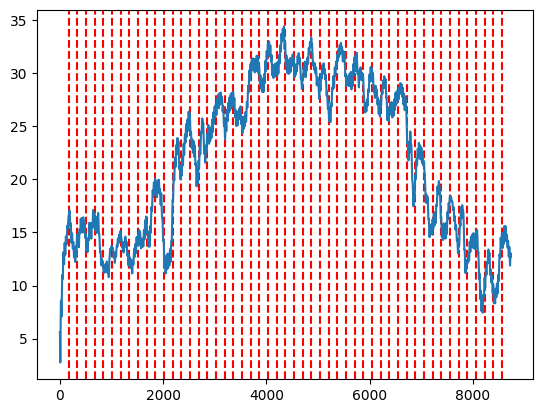

In [6]:
for i in range(num_weeks-1):
    plt.axvline(neutral_env.length_of_period*(i+1), color="red", linestyle="dashed")
plt.plot(pd.Series(total_obs[:, -4]).ewm(48).mean())